In [82]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
#SAMAINES 1 & 2

In [84]:

df = pd.read_csv("dataset.csv", encoding="ISO-8859-1")
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [85]:
df.columns = ['sentiment', 'tweet_id', 'tweet_date', 'query', 'user_name', 'text']
df.head()

,sentiment,tweet_id,tweet_date,query,user_name,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   sentiment   1599999 non-null  int64 
 1   tweet_id    1599999 non-null  int64 
 2   tweet_date  1599999 non-null  object
 3   query       1599999 non-null  object
 4   user_name   1599999 non-null  object
 5   text        1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [87]:
df = df[['tweet_id','text', 'sentiment']]
df

,tweet_id,text,sentiment
0,1467810672,is upset that he can't update his Facebook by ...,0
1,1467810917,@Kenichan I dived many times for the ball. Man...,0
2,1467811184,my whole body feels itchy and like its on fire,0
3,1467811193,"@nationwideclass no, it's not behaving at all....",0
4,1467811372,@Kwesidei not the whole crew,0
...,...,...,...
1599994,2193601966,Just woke up. Having no school is the best fee...,4
1599995,2193601969,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,2193601991,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,2193602064,Happy 38th Birthday to my boo of alll time!!! ...,4


pretraitement 

In [89]:
# Convertir tout le texte en minuscules
df['text'] = df['text'].str.lower()

# Supprimer les mentions (ex. @user)
df['text'] = df['text'].str.replace(r'@\w+', '', regex=True)

# Supprimer les hashtags (ex. #hashtag)
df['text'] = df['text'].str.replace(r'#\w+', '', regex=True)

# Supprimer les liens URL (ex. http://... ou https://...)
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)

# Supprimer les caractères spéciaux (laisser seulement les lettres et les espaces)
df['text'] = df['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df

,tweet_id,text,sentiment
0,1467810672,is upset that he cant update his facebook by t...,0
1,1467810917,i dived many times for the ball managed to sa...,0
2,1467811184,my whole body feels itchy and like its on fire,0
3,1467811193,no its not behaving at all im mad why am i he...,0
4,1467811372,not the whole crew,0
...,...,...,...
1599994,2193601966,just woke up having no school is the best feel...,4
1599995,2193601969,thewdbcom very cool to hear old walt intervie...,4
1599996,2193601991,are you ready for your mojo makeover ask me fo...,4
1599997,2193602064,happy th birthday to my boo of alll time tupac...,4


In [90]:
# Préparation des données avec 3 classes
count_pos = df[df['sentiment'] == 4].shape[0]  
count_neg = df[df['sentiment'] == 0].shape[0]  
count_neu = df[df['sentiment'] == 2].shape[0]
print(f"Nombre d'avis POSITIFS: {count_pos}")
print(f"Nombre d'avis NÉGATIFS: {count_neg}")
print(f"Nombre d'avis NEUTRS: {count_neu}")

Nombre d'avis POSITIFS: 800000
Nombre d'avis NÉGATIFS: 799999
Nombre d'avis NEUTRS: 0


In [91]:
#  Division des données
X = df['text']
y = df['sentiment'].map({0: 0, 4: 1})  # Conversion en binaire (0=Négatif, 1=Positif)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Affichage des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {len(X_train)}")
print(f"Taille de l'ensemble de test : {len(X_test)}")

Taille de l'ensemble d'entraînement : 1279999
Taille de l'ensemble de test : 320000


Text(0, 0.5, 'Nombre de tweets')

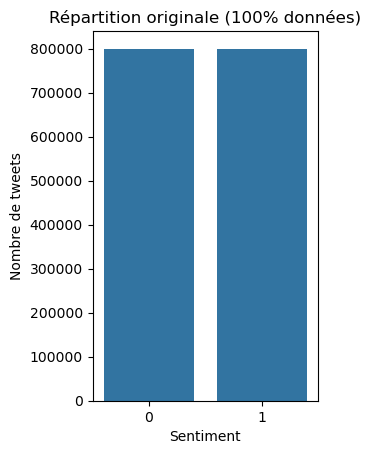

In [92]:
# Répartition avant division
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Répartition originale (100% données)')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de tweets')

In [ ]:
# SEMAINE 3 & 4